## Laden der Daten

Zuerst laden wir den Iris-Datensatz und schauen uns die ersten paar Zeilen an, um ein Gefühl für die Daten zu bekommen.

Bevor wir den Iris-Datensatz analysieren, ist es wichtig, die Merkmale zu verstehen, die darin enthalten sind.

- Kelchblattlänge (Sepal Length): Die Länge des äußeren Blütenblatts (Kelchblatt) einer Blume, gemessen in Zentimetern
- Kelchblattbreite (Sepal Width): Die Länge des äußeren Blütenblatts (Kelchblatt) einer Blume, gemessen in Zentimetern
- Kronblattlänge (Petal Length): Die Länge des inneren Blütenblatts (Kronblatt) einer Blume, gemessen in Zentimetern
- Kronblattbreite (Petal Width): Die Breite des inneren Blütenblatts (Kronblatt) einer Blume, gemessen in Zentimetern

![Iris Setosa](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Irissetosa1.jpg/1024px-Irissetosa1.jpg)

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Laden des Iris-Datensatzes
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Anzeigen der ersten paar Zeilen des Datensatzes
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


## Analyse des Datensatzes
Als nächstes analysieren wir die Verteilung der Daten und die Beziehungen zwischen den Merkmalen. Wir werden verschiedene Visualisierungen verwenden, um die Daten besser zu verstehen.

Dieser sogenannte Paarplot zeigt die Beziehungen zwischen den verschiedenen Merkmalen und wie sie zur Unterscheidung der verschiedenen Iris-Arten beitragen.

### Paarplot

- Scatterplots (Nicht-Diagonale): Jeder Scatterplot stellt zwei Merkmale gegeneinander dar, wobei die Punkte entsprechend ihrer Klasse (Art der Iris-Blume) eingefärbt sind. Zum Beispiel zeigt das Diagramm in der ersten Zeile und zweiten Spalte die Beziehung zwischen der Kelchblattlänge und der Kelchblattbreite.
- Histogramme (Diagonale): Diese zeigen die Verteilung jedes einzelnen Merkmals für jede Klasse. Zum Beispiel zeigt das Histogramm in der ersten Zeile und ersten Spalte die Verteilung der Kelchblattlänge.

**Aufgabe**: Analysiere den bereitgestellten Paarplot des Iris-Datensatzes und beantworte die folgenden Fragen.

1. Unterscheidbarkeit der Iris-Arten:
  - Welche Merkmale scheinen die verschiedenen Iris-Arten am besten zu trennen? Begründe deine Antwort anhand der sichtbaren Verteilungen und Trennungen im Paarplot.

2. Verteilung der Merkmale:
  - Betrachte die Histogramme auf der Diagonale des Plots. Welche Merkmale zeigen eine deutliche Trennung der Verteilungen zwischen den verschiedenen Iris-Arten? Nenne mindestens zwei Merkmale und beschreibe ihre Verteilung.

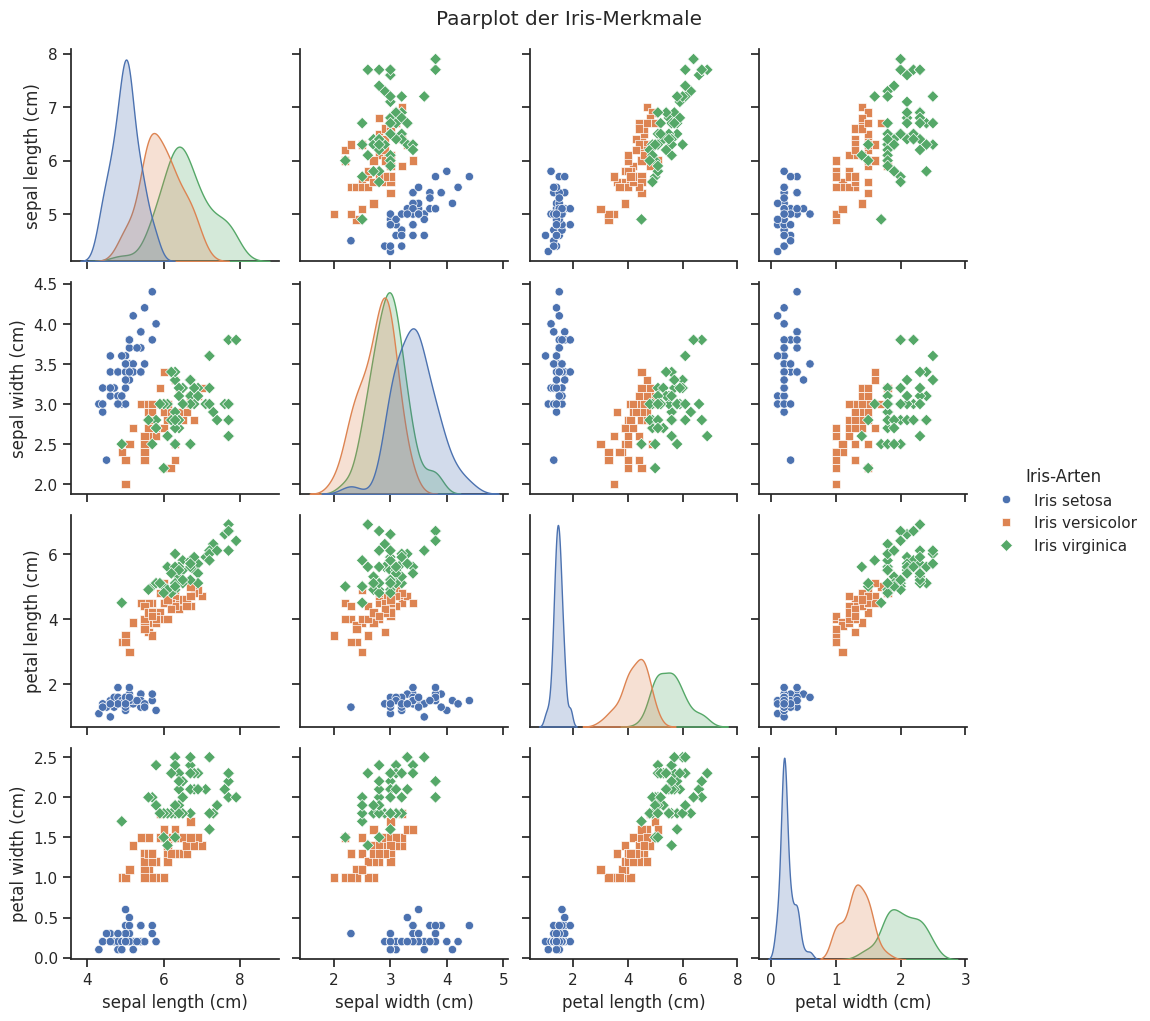

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris

# Laden des Iris-Datensatzes
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Umbenennen der Zielspalte in die Namen der Iris-Arten
df['target'] = df['target'].map({0: 'Iris setosa', 1: 'Iris versicolor', 2: 'Iris virginica'})

# Setzen von Stil für die Visualisierung
sns.set(style="ticks")

# Paarplot der Merkmale
pairplot = sns.pairplot(df, hue="target", markers=["o", "s", "D"])
pairplot._legend.set_title('Iris-Arten')

plt.suptitle('Paarplot der Iris-Merkmale', y=1.02)
plt.show()

## Trainierung eines KNN-Modells

Nun werden wir ein K-Nearest Neighbors (KNN) Modell trainieren. KNN ist ein einfaches, aber effektives Klassifizierungsverfahren, bei dem die Klasse einer Probe durch die Klassen ihrer k nächsten Nachbarn bestimmt wird.

Falls du nochmal eine Einleitung in KNN brauchst, gucke dir nochmal das Kapitel "Theorie: KI-ALgorithmen" an.

Ein neues Konzept ist das sogenannte "skalieren".
Beim Training eines K-Nearest Neighbors (KNN) Modells ist das Skalieren der Merkmale entscheidend, da die Merkmale unterschiedliche Größenordnungen haben können. Ohne Skalierung würden Merkmale mit größeren Wertebereichen die Distanzberechnung dominieren und die Modellleistung verzerren. Durch das Skalieren werden alle Merkmale auf eine einheitliche Skala gebracht, was eine faire und genaue Distanzberechnung ermöglicht. Dies führt in der Regel zu einer besseren Modellgenauigkeit und -zuverlässigkeit.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Aufteilen der Daten in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Skalieren der Merkmale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Trainieren des KNN-Modells
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Analyse der Genauigkeit des trainierten Modells
Wir bewerten nun die Genauigkeit unseres KNN-Modells mithilfe der Testdaten.

### Konfusionsmatrix

Die visuelle Konfusionsmatrix ist wie ein großes Tabellenbild, das zeigt, wie gut unser Modell arbeitet. In diesem Bild sehen wir:

- **Zeilen**: Die echten Klassen oder Kategorien.
- **Spalten**: Die von unserem Modell vorhergesagten Klassen.

Jede Zelle in der Tabelle zeigt, wie oft unser Modell eine bestimmte Klasse korrekt oder falsch vorhergesagt hat. Die Farben in der Tabelle helfen dabei, schnell zu erkennen, wo das Modell gut ist und wo es Schwierigkeiten hat. Dunklere Farben bedeuten mehr Vorhersagen. Ideal ist es, wenn alle Werte in der Hauptdiagonalen (von oben links nach unten rechts) liegen, was bedeutet, dass unser Modell in den meisten Fällen richtig liegt.

**Aufgabe: Bewerte die Genauigkeit des Modells**
- Wie genau ist das Modell?
- In welchen Bereichen hat das Modell Falschvorhersagen getroffen?

Genauigkeit des KNN-Modells: 1.00
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



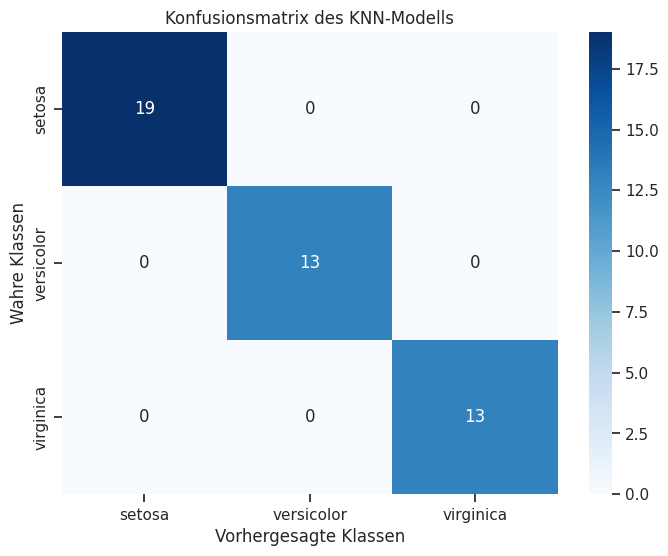

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Vorhersagen auf den Testdaten
y_pred = knn.predict(X_test)

# Berechnung der Genauigkeit
accuracy = accuracy_score(y_test, y_pred)
print(f'Genauigkeit des KNN-Modells: {accuracy:.2f}')

# Detaillierter Klassifikationsbericht
print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))

# Konfusionsmatrix berechnen
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisierung der Konfusionsmatrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Vorhergesagte Klassen')
plt.ylabel('Wahre Klassen')
plt.title('Konfusionsmatrix des KNN-Modells')
plt.show()

## Visualisierung des KNN-Modells
Zur besseren Verständlichkeit visualisieren wir die Entscheidungsgrenzen des KNN-Modells. Da wir nur zwei Dimensionen gleichzeitig darstellen können, werden wir immer zwei Merkmale auswählen und ein neues KNN generieren.

Die Merkmale, welche zur Visualisierung genutzt werden können von dir ausgesucht werden. Benutze dazu die Dropdown-Menüs: "Merkmal 1" und "Merkmal 2".

Diesen Code musst du nicht verstehen, experimentiere stattdessen mit den Parametern und generiere Visualisierungen für verschiedene Parameterkombinationen.

**Achtung: Eine Visualisierung zu generieren kann bis zu 30 Sekunden dauern!**

**Aufgabe**: Experimentiere mit verschiedenen Visualisierungen:
- Was fällt dir auf?
- Welche Merkmalskombinationen sind klar separiert und welche nicht?

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, clear_output

# Laden des Iris-Datensatzes
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Umbenennen der Zielspalte in die Namen der Iris-Arten
df['target'] = df['target'].map({0: 'Iris setosa', 1: 'Iris versicolor', 2: 'Iris virginica'})

# Aufteilen der Daten in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Skalieren der Merkmale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Trainieren des KNN-Modells
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Ladeindikator Widget
loading_indicator = widgets.Label(value="Lädt...")

# Interaktive Visualisierung
def plot_knn_decision_boundary(feature1, feature2):
    display(loading_indicator)  # Ladeindikator anzeigen
    clear_output(wait=True)  # Vorherige Ausgabe löschen
    X = iris.data[:, [feature1, feature2]]
    y = iris.target

    # Skalieren der ausgewählten Merkmale
    X = scaler.fit_transform(X)
    knn.fit(X, y)

    # Erstellen eines Gitters von Punkten
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Vorhersagen für jedes Gitterpunkt
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Zeichnen der Entscheidungsgrenzen
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.xlabel(iris.feature_names[feature1])
    plt.ylabel(iris.feature_names[feature2])
    plt.title('KNN Entscheidungsgrenzen ({} vs {})'.format(iris.feature_names[feature1], iris.feature_names[feature2]))
    plt.show()
    clear_output(wait=True)  # Ladeindikator löschen

# Dropdown-Menüs für die Auswahl der Merkmale
feature1_selector = widgets.Dropdown(
    options=[(name, idx) for idx, name in enumerate(iris.feature_names)],
    value=0,
    description='Merkmal 1:',
)

feature2_selector = widgets.Dropdown(
    options=[(name, idx) for idx, name in enumerate(iris.feature_names)],
    value=1,
    description='Merkmal 2:',
)

# Interaktiver Plot
interact(plot_knn_decision_boundary, feature1=feature1_selector, feature2=feature2_selector);


interactive(children=(Dropdown(description='Merkmal 1:', options=(('sepal length (cm)', 0), ('sepal width (cm)…

## Der Parameter _k_

Der Parameter _k_ bestimmt die Anzahl der Punkte, die für eine Klassifizierung beachtet werden. Nachdem du dieses Feld ausführst, erscheint ein Slider, mit welchem du den Parameter _k_ anpassen kannst.

**Aufgabe: Experimentiere mit dem Parameter _k_**
- Was passiert bei geringen Werten von _k_?
- Was passiert bei hohen Werten von _k_?
- In welchem Bereich ist die Genauigkeit des Modells optimal?

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, clear_output

# Laden des Iris-Datensatzes
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Umbenennen der Zielspalte in die Namen der Iris-Arten
df['target'] = df['target'].map({0: 'Iris setosa', 1: 'Iris versicolor', 2: 'Iris virginica', 3: 'Iris unknown'})

# Aufteilen der Daten in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Skalieren der Merkmale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ladeindikator Widget
loading_indicator = widgets.Label(value="Lädt...")

# Interaktive Visualisierung für K-Werte
def analyze_knn(k):
    display(loading_indicator)  # Ladeindikator anzeigen
    clear_output(wait=True)  # Vorherige Ausgabe löschen

    # Trainieren des KNN-Modells mit dem gewählten K-Wert
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Vorhersagen auf den Testdaten
    y_pred = knn.predict(X_test)

    # Berechnung der Genauigkeit
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Genauigkeit des KNN-Modells mit k={k}: {accuracy:.2f}')

    # Detaillierter Klassifikationsbericht
    print("Klassifikationsbericht:")
    print(classification_report(y_test, y_pred))

    # Konfusionsmatrix berechnen
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Visualisierung der Konfusionsmatrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel('Vorhergesagte Klassen')
    plt.ylabel('Wahre Klassen')
    plt.title(f'Konfusionsmatrix des KNN-Modells (k={k})')
    plt.show()

# Slider für die Auswahl des K-Werts
k_selector = widgets.IntSlider(
    value=3,
    min=1,
    max=50,
    step=1,
    description='Wert für k:',
    continuous_update=False
)

# Interaktiver Plot
interact(analyze_knn, k=k_selector);

interactive(children=(IntSlider(value=3, continuous_update=False, description='Wert für k:', max=50, min=1), O…